# Week 16 Trend Analyis

In [ ]:
import os
# the datasets we will using this week are 
# 1) billboard_lyrics_1964-2015.csv and 2) Concreteness_ratings_Brysbaert_et_al_BRM.txt

if os.path.exists('W16'): 
    !rm -fr 'W16/'
!git clone https://github.com/music-data-mining/W16.git
%cd W16

Cloning into 'W16'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 2), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
/content/W16/W16


# New Section

In [ ]:
# install spacy, an super useful nlp library
!pip install -Uq spacy

In [ ]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
text = "Yesterday all my troubles seemed so far away. Now it looks as though they're here to stay. Oh, I believe in yesterday. \
Suddenly, I'm not half the man I used to be. There's a shadow hanging over me. Oh, yesterday came suddenly."

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
# what is lemmatisation? Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # https://spacy.io/models/en#en_core_web_sm

doc = nlp(text)

# we can parse the text and get lemmatization, part-of-speech, and whether a stop word for each parsed token (yes, not word, let's call it a token)
for token in doc:
  print(token.text, token.lemma_, token.pos_, token.is_stop)
  # print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, 
        # token.shape_, token.is_alpha, token.is_stop)

Yesterday yesterday NOUN False
all all DET True
my my PRON True
troubles trouble NOUN False
seemed seem VERB True
so so ADV True
far far ADV False
away away ADV False
. . PUNCT False
Now now ADV True
it it PRON True
looks look VERB False
as as ADP True
though though SCONJ True
they they PRON True
're be AUX True
here here ADV True
to to PART True
stay stay VERB False
. . PUNCT False
Oh oh INTJ False
, , PUNCT False
I I PRON True
believe believe VERB False
in in ADP True
yesterday yesterday NOUN False
. . PUNCT False
Suddenly suddenly ADV False
, , PUNCT False
I I PRON True
'm be AUX True
not not PART True
half half DET False
the the DET True
man man NOUN False
I I PRON True
used use VERB True
to to PART True
be be AUX True
. . PUNCT False
There there PRON True
's be AUX True
a a DET True
shadow shadow NOUN False
hanging hang VERB False
over over ADP True
me I PRON True
. . PUNCT False
Oh oh INTJ False
, , PUNCT False
yesterday yesterday NOUN False
came come VERB False
suddenly suddenly

In [ ]:
# let's extract lemmatized words and eliminate punctionations
lemmatized_words =[]
for token in doc:
  if token.pos_ == 'PUNCT':
    pass
  else:
    lemmatized_words.append(token.lemma_)
print(lemmatized_words)

['yesterday', 'all', 'my', 'trouble', 'seem', 'so', 'far', 'away', 'now', 'it', 'look', 'as', 'though', 'they', 'be', 'here', 'to', 'stay', 'oh', 'I', 'believe', 'in', 'yesterday', 'suddenly', 'I', 'be', 'not', 'half', 'the', 'man', 'I', 'use', 'to', 'be', 'there', 'be', 'a', 'shadow', 'hang', 'over', 'I', 'oh', 'yesterday', 'come', 'suddenly']


In [ ]:
df = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding='latin-1')

In [ ]:
# how does billboard_lyrics_1964-2015.csv look like
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [ ]:
# extract lemmatized lyrics from each song
lemmatized_lyrics=[]
year=[]
for i in range(len(df['Lyrics'])):
  if type(df['Lyrics'][i]) is not str:
    continue
  elif len(df['Lyrics'][i]) < 20:
    continue
  else:    
    lemmatized_lyrics.append([])
    doc = nlp(df['Lyrics'][i])

    for token in doc:
      if token.pos_ == 'PUNCT':
        continue
      elif token.text == ' ':
        continue  
      elif token.text == '  ':
        continue    
      else:
        lemmatized_lyrics[-1].append(token.lemma_)
    # print(lemmatized_lyrics[-1])
    year.append(df['Year'][i])
year = np.array(year)


In [ ]:
# read in concreteness ratings
df_conc = pd.read_csv('Concreteness_ratings_Brysbaert_et_al_BRM.txt', encoding='latin-1', 
                      delimiter='\t', converters={'Word': str})

In [ ]:
df_conc.head()

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.96,0,0
1,traindriver,0,4.54,0.71,3,29,0.90,0,0
2,tush,0,4.45,1.01,3,25,0.88,66,0
3,hairdress,0,3.93,1.28,0,29,1.00,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.85,0,0


In [ ]:
conc_dict = {df_conc['Word'][i]: df_conc['Conc.M'][i] for i in range(len(df_conc['Word']))}

In [ ]:
# check lyrics concreteness against the rating table
concValue=[]
for text in lemmatized_lyrics:
  concValueList = []
  for word in text:
    try:
      concValueList.append(conc_dict[word])
    except Exception as inst:
      pass
  concValue.append(np.mean(np.array(concValueList)))

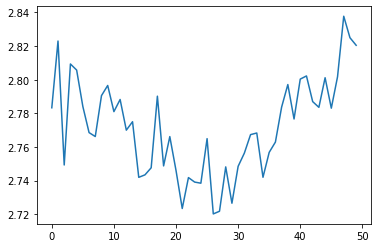

In [ ]:
# draw it
concValue=np.array(concValue)
concValueYear=[]
for y in range(1965, 2015):
  concValueYear.append(np.mean(concValue[np.where(year==y)]))
concValueYear=np.array(concValueYear)
plt.figure()
plt.plot(concValueYear)